In [75]:
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np

In [2]:
import os
import glob

def get_all_csvs(path):
    extension = 'csv'
    result = glob.glob(path+'/*.{}'.format(extension))
    return result

In [3]:
fns = get_all_csvs('trained_maps')
print(fns)

['trained_maps\\testing_2012-01-28_to_2013-01-27.csv', 'trained_maps\\testing_2012-04-29_to_2013-04-28.csv', 'trained_maps\\testing_2012-07-29_to_2013-07-28.csv', 'trained_maps\\testing_2012-10-28_to_2013-10-27.csv', 'trained_maps\\testing_2013-01-27_to_2014-01-27.csv', 'trained_maps\\testing_2013-04-29_to_2014-04-28.csv', 'trained_maps\\testing_2013-07-29_to_2014-07-28.csv', 'trained_maps\\testing_2013-10-28_to_2014-10-27.csv', 'trained_maps\\testing_2014-01-27_to_2015-01-27.csv', 'trained_maps\\testing_2014-04-29_to_2015-04-28.csv', 'trained_maps\\testing_2014-07-29_to_2015-07-28.csv', 'trained_maps\\testing_2014-10-28_to_2015-10-27.csv', 'trained_maps\\testing_2015-01-27_to_2016-01-27.csv', 'trained_maps\\testing_2015-04-29_to_2016-04-27.csv', 'trained_maps\\testing_2015-07-29_to_2016-07-27.csv', 'trained_maps\\testing_2015-10-28_to_2016-10-26.csv', 'trained_maps\\testing_2016-01-27_to_2017-01-26.csv', 'trained_maps\\testing_2016-04-28_to_2017-04-27.csv', 'trained_maps\\testing_2016

In [4]:
dfs = [pd.read_csv(fn) for fn in fns]

# Extract the datetime of each map (from the filenames)

In [96]:
start = pd.Timestamp('2013-01-27')
end   = pd.Timestamp('2018-04-27')
temp = end - start
time  = [start + i * temp/(len(dfs))  for i in range(0, len(dfs))]
time = pd.to_datetime(time)

In [97]:
features = list(dfs[0].columns[6:])

# Section 1: US politics

# Presidents
How strongly were the 3 main candidates of the US election represented in the press?

In [180]:

labeller = lambda x,y: '$ H_j('+x+',  '+y+') $'

overlapper = lambda F1, CF: [(df[F1] * df[CF]).mean()/(df[F1].mean()*df[CF].mean()) for df in dfs]
magnitude = lambda F: [df[F].sum()/df.sum().sum() for df in dfs]


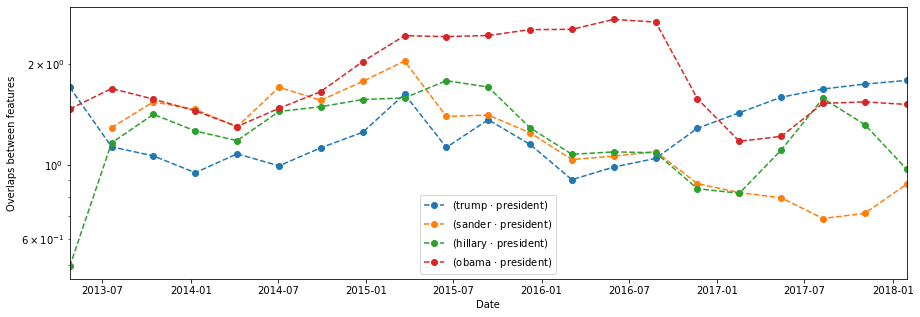

In [99]:
Fs = ['trump', 'sander','hillary','obama']
CF = 'president'
       
plt.figure(figsize=(15,5))
for F in Fs:
    temp = np.array(overlapper(F, CF))
    temp[temp <= 1e-5] = np.nan
    plt.plot(time, temp, '--o', label = labeller(F, CF))
plt.legend()

plt.yscale('log')
plt.legend()

plt.ylabel('Overlaps between features')
plt.xlabel('Date')
#plt.ylim([.5e-4, 0.5])
plt.xlim([time[1], time[-1]])

plt.savefig('presidents_timeline.pdf')

# Trump becomes more closely connected to president on Nov 20th 2016.
# Trump wins on Nov 7th 2016.

In [113]:
features

['accused',
 'actor',
 'actress',
 'airline',
 'airport',
 'album',
 'allegedly',
 'animal',
 'apple',
 'arrested',
 'art',
 'artist',
 'assault',
 'athlete',
 'attack',
 'award',
 'baby',
 'bank',
 'beach',
 'beauty',
 'beer',
 'bernie',
 'best',
 'bill',
 'black',
 'book',
 'bowl',
 'boy',
 'brain',
 'bride',
 'business',
 'cake',
 'california',
 'campaign',
 'cancer',
 'candidate',
 'card',
 'carpet',
 'cat',
 'ceo',
 'check',
 'child',
 'china',
 'chocolate',
 'christian',
 'church',
 'city',
 'clean',
 'climate',
 'clinton',
 'college',
 'community',
 'company',
 'congress',
 'consumer',
 'cop',
 'couple',
 'court',
 'cover',
 'credit',
 'customer',
 'dad',
 'daily',
 'dating',
 'daughter',
 'dead',
 'democrat',
 'democratic',
 'design',
 'designer',
 'destination',
 'diet',
 'dinner',
 'disease',
 'dish',
 'divorce',
 'dog',
 'donald',
 'dress',
 'drink',
 'earth',
 'eat',
 'eating',
 'editor',
 'education',
 'election',
 'europe',
 'exercise',
 'facebook',
 'fan',
 'fashion',
 '

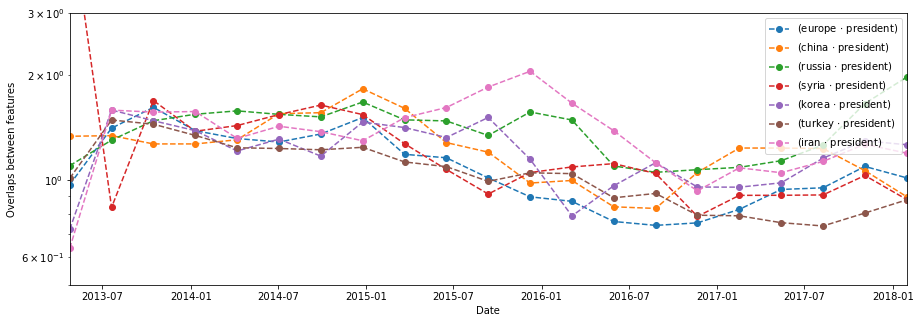

In [117]:
Fs  = ['europe', 'china', 'russia', 'syria', 'korea', 'turkey', 'iran']
CF = 'president'
       
plt.figure(figsize=(15,5))
for F in Fs:
    temp = np.array(overlapper(F, CF))
    temp[temp <= 1e-5] = np.nan
    plt.plot(time, temp, '--o', label = labeller(F, CF))
plt.legend()

plt.yscale('log')
plt.legend()

plt.ylabel('Overlaps between features')
plt.xlabel('Date')
plt.ylim([0.5, 3])
plt.xlim([time[1], time[-1]])

plt.savefig('presidents_timeline.pdf')

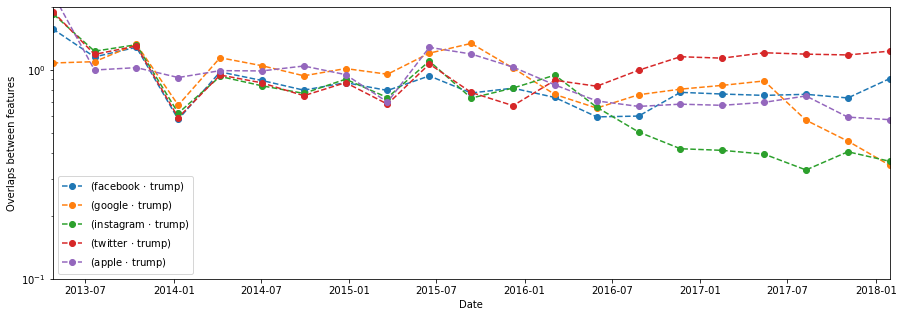

In [122]:
Fs  = ['facebook', 'google', 'instagram', 'twitter', 'apple']
CF = 'trump'

plt.figure(figsize=(15,5))
for F in Fs:
    temp = np.array(overlapper(F, CF))
    temp[temp <= 1e-5] = np.nan
    plt.plot(time, temp, '--o', label = labeller(F, CF))
plt.legend()

plt.yscale('log')
plt.legend()

plt.ylabel('Overlaps between features')
plt.xlabel('Date')
plt.ylim([0.1, 2])
plt.xlim([time[1], time[-1]])

plt.savefig('presidents_timeline.pdf')

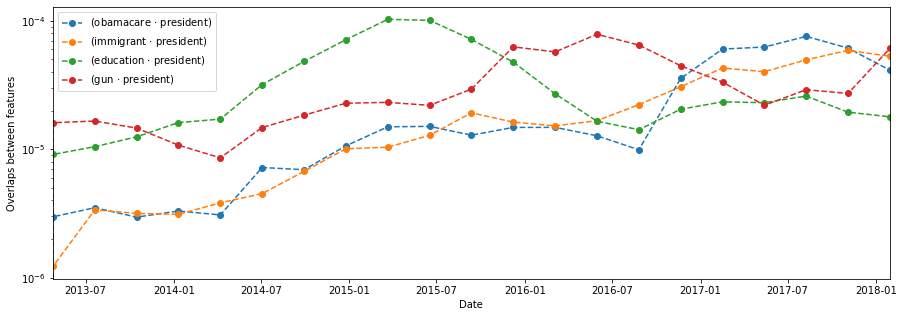

In [179]:
Fs  = ['obamacare', 'immigrant', 'education', 'gun']
CF = 'president'
       
plt.figure(figsize=(15,5))
for F in Fs:
    temp = np.array(magnitude(F))
    plt.plot(time, temp, '--o', label = labeller(F, CF))
plt.legend()

plt.yscale('log')
plt.legend()

plt.ylabel('Overlaps between features')
plt.xlabel('Date')
#plt.ylim([0.5, 3])
plt.xlim([time[1], time[-1]])

plt.savefig('issues_timeline.pdf')

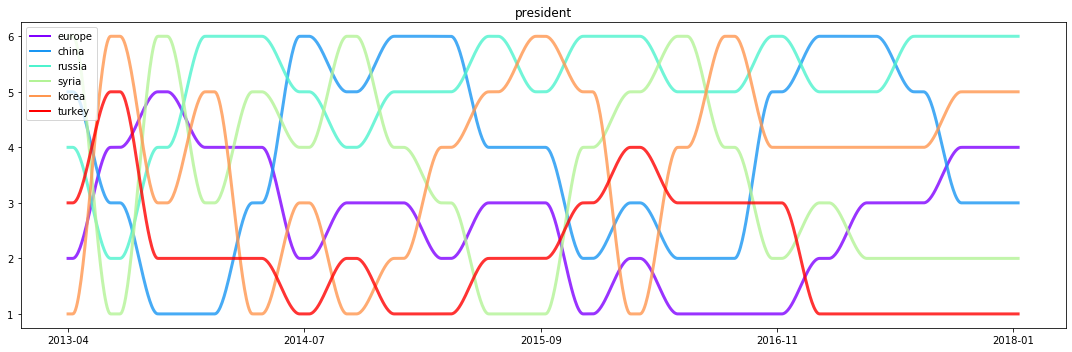

In [124]:
Fs  = ['europe', 'china', 'russia', 'syria', 'korea', 'turkey']
CF = 'president'

plt.figure(figsize=(15,5))
ax  = plt.gca()
temp = pd.DataFrame(
    {F:overlapper(F, CF)[1:] for F in Fs}, 
    index=time[1:]).T

color_dict = {k:rainbow(i/(len(Fs)-1)) for i,k in enumerate(Fs)} 

custom_lines = [Line2D([0], [0], color=color_dict[k], lw=2) for k in Fs]
bumpsplot(temp, ax = ax, color_dict = color_dict)
ax.set_title(CF)

axarr[-1].legend(custom_lines, Fs)
axarr[0].set_ylabel('Overlaps between features')
[ax.set_xlabel('Date') for ax in axarr]

plt.legend(custom_lines, Fs)

axarr[0].set_xlim([2,len(dfs)-2])
plt.tight_layout()

#plt.savefig('presidents_timeline.pdf')

# Trump VS Obama policies

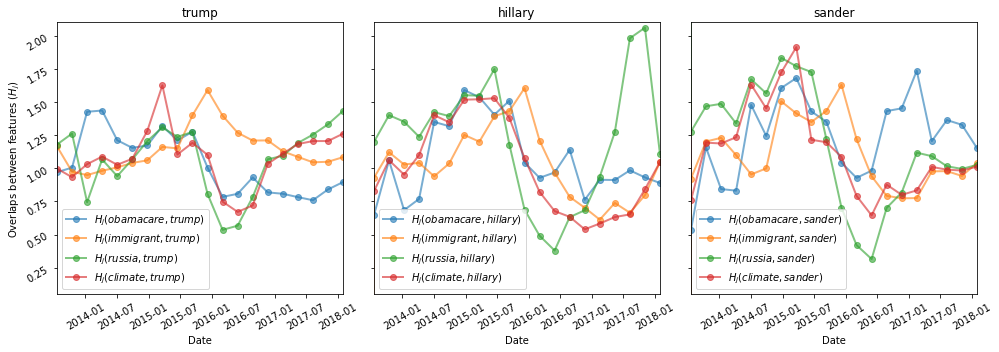

In [211]:
Fs  = ['obamacare', 'immigrant', 'russia', 'climate']
CFs = ['trump', 'hillary', 'sander']

fig, axarr = plt.subplots(1,len(CFs), figsize=(14,5), sharex=True, sharey=True)
for ax,CF in zip(axarr, CFs):
    for F in Fs:
        ax.plot(time, overlapper(F, CF), 'o-', lw=2, label = labeller(F, CF), alpha=0.6)
    ax.legend(loc=3)
    ax.set_title(CF)
    ax.tick_params(rotation=30)

#axarr[0].set_yscale('log')
axarr[0].set_ylabel('Overlaps between features $(H_j)$')
[ax.set_xlabel('Date') for ax in axarr]

plt.ylim([.05, 2.1])
plt.xlim([time[2], time[-1]])
plt.tight_layout()

plt.savefig('candidates_timeline.pdf')

In [138]:
'murder' in features

True

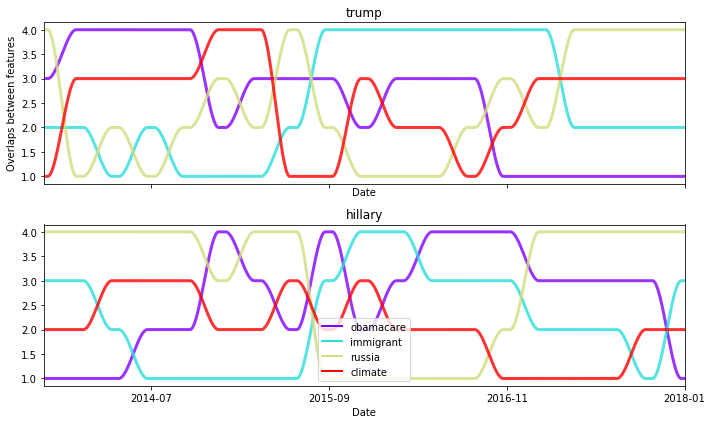

In [143]:
Fs  = ['obamacare', 'immigrant', 'russia', 'climate']
CFs = ['trump', 'hillary']

fig, axarr = plt.subplots(len(CFs), 1, figsize=(10,6), sharex=True, sharey=True)
for ax,CF in zip(axarr, CFs):
    
    temp = pd.DataFrame(
        {F:overlapper(F, CF)[1:] for F in Fs}, 
        index=time[1:]).T
    
    color_dict = {k:rainbow(i/(len(Fs)-1)) for i,k in enumerate(Fs)} 
    
    custom_lines = [Line2D([0], [0], color=color_dict[k], lw=2) for k in Fs]
    bumpsplot(temp, ax = ax, color_dict = color_dict)
    ax.set_title(CF)
    
axarr[-1].legend(custom_lines, Fs)
axarr[0].set_ylabel('Overlaps between features')
[ax.set_xlabel('Date') for ax in axarr]

axarr[0].set_xlim([2,len(dfs)-2])
plt.tight_layout()

#plt.savefig('presidents_timeline.pdf')

([<matplotlib.axis.YTick at 0x2139d5a3860>,
 <a list of 6 Text yticklabel objects>)

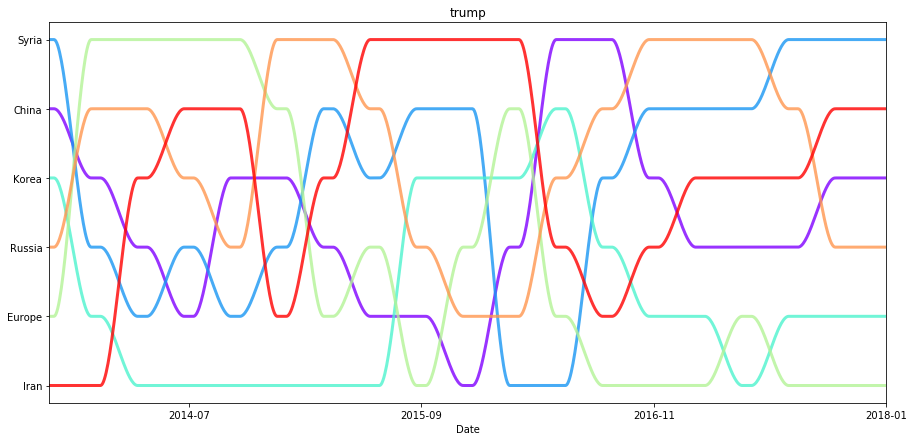

In [144]:
Fs = ['korea', 'russia','europe','syria','china', 'iran']
CF = 'trump'

plt.figure(figsize=(15,7))
ax = plt.gca()

temp = pd.DataFrame(
    {F:np.array(overlapper(F, CF)[1:])+np.array(overlapper(F, CF)[:-1]) for F in Fs}, 
    index=time[1:]).T

color_dict = {k:rainbow(i/(len(Fs)-1)) for i,k in enumerate(Fs)} 

custom_lines = [Line2D([0], [0], color=color_dict[k], lw=2) for k in Fs]
bumpsplot(temp, ax = ax, color_dict = color_dict)
plt.title(CF)
    
#plt.legend(custom_lines, Fs)
plt.xlabel('Date')

plt.xlim([2,len(dfs)-2])
plt.yticks(np.arange(1,7),['Iran','Europe','Russia','Korea','China','Syria'])


#plt.savefig('presidents_timeline.pdf')

# Bump plot

In [71]:
from collections import defaultdict

def add_widths(x, y, width=0.1):
    """ Adds flat parts to widths """
    new_x = []
    new_y = []
    for i,j in zip(x,y):
        new_x += [i-width, i, i+width]
        new_y += [j, j, j]
    return new_x, new_y

def bumpsplot(dataframe, ax,
              color_dict=defaultdict(lambda: "k"), 
              linewidth_dict=defaultdict(lambda: 3),
              labels=[]):
    from scipy import interpolate
    
    r = dataframe.rank(method="first")
    r = (r - r.max() + r.max().max()).fillna(0) # Sets NAs to 0 in rank
    for i in r.index:
        x = np.arange(r.shape[1])
        y = r.loc[i].values
        color = color_dict[i]
        lw = linewidth_dict[i]
        x, y = add_widths(x, y, width=0.1)
        xs = np.linspace(0, x[-1], num=1024)
        ax.plot(xs, interpolate.PchipInterpolator(x, y)(xs), 
                color=color, linewidth=lw, alpha=0.8, label=i)
        if i in labels:
            ax.text(x[0] - 0.1, y[0], s=i, horizontalalignment="right", verticalalignment="center", color=color)
            ax.text(x[-1] + 0.1, y[-1], s=i, horizontalalignment="left", verticalalignment="center", color=color)
    plt.xticks(np.arange(r.shape[1])[::5], pd.to_datetime(dataframe.columns).strftime('%Y-%m')[::5])

In [147]:
features

['accused',
 'actor',
 'actress',
 'airline',
 'airport',
 'album',
 'allegedly',
 'animal',
 'apple',
 'arrested',
 'art',
 'artist',
 'assault',
 'athlete',
 'attack',
 'award',
 'baby',
 'bank',
 'beach',
 'beauty',
 'beer',
 'bernie',
 'best',
 'bill',
 'black',
 'book',
 'bowl',
 'boy',
 'brain',
 'bride',
 'business',
 'cake',
 'california',
 'campaign',
 'cancer',
 'candidate',
 'card',
 'carpet',
 'cat',
 'ceo',
 'check',
 'child',
 'china',
 'chocolate',
 'christian',
 'church',
 'city',
 'clean',
 'climate',
 'clinton',
 'college',
 'community',
 'company',
 'congress',
 'consumer',
 'cop',
 'couple',
 'court',
 'cover',
 'credit',
 'customer',
 'dad',
 'daily',
 'dating',
 'daughter',
 'dead',
 'democrat',
 'democratic',
 'design',
 'designer',
 'destination',
 'diet',
 'dinner',
 'disease',
 'dish',
 'divorce',
 'dog',
 'donald',
 'dress',
 'drink',
 'earth',
 'eat',
 'eating',
 'editor',
 'education',
 'election',
 'europe',
 'exercise',
 'facebook',
 'fan',
 'fashion',
 '

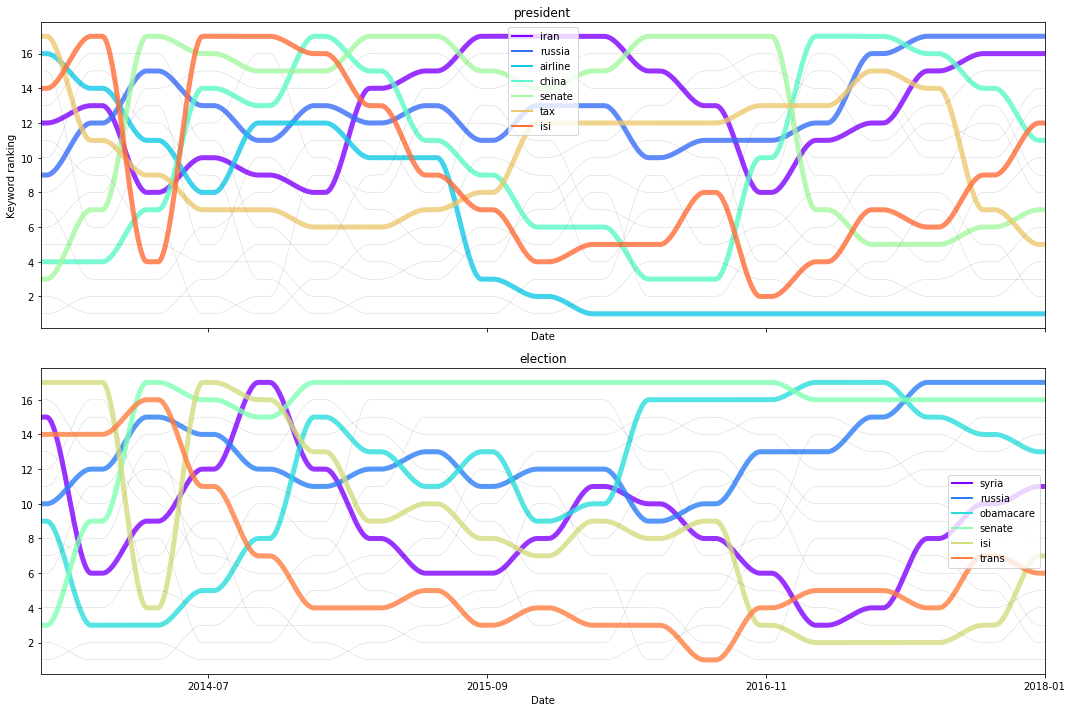

In [166]:

CFs = ['president', 'election']
Fs = list(set(features) - set(CFs))
n_top = 1

features_select = [
    'iran', 'syria', 'russia', 'obamacare', 'congress', 
    'airline', 'china', 'senate', 'immigrant', 'tax',
    'isi', 'lgbt', 'trans', 'muslim', 'nuclear', 'education', 'health'] 

fig, axarr = plt.subplots(len(CFs), 1, figsize=(15,10), sharex=True, )
for ax,CF in zip(axarr, CFs):
    temp = pd.DataFrame({F:overlapper(F, CF)[1:] for F in features_select}, 
                        index=time[1:]).T
    nrows = temp.shape[0]
    rel_kwords = temp[(temp.iloc[:,1:].rank(method='first').T.max()>=nrows-n_top+1)].index

    lw_dict = {k:5 if k in rel_kwords else 0.1 for k in features_select}
    color_dict = {k:'k' for k in list(set(features_select)-set(rel_kwords))}
    for i,k in enumerate(rel_kwords): color_dict[k]=rainbow(i/len(rel_kwords))
        
    custom_lines = [Line2D([0], [0], color=color_dict[k], lw=2) for k in rel_kwords]
    
    bumpsplot(temp, ax = ax, 
              linewidth_dict = lw_dict,
              color_dict = color_dict)
    ax.set_title(CF)
    #ax.set_ylim([len(rel_kwords)-6.5,len(rel_kwords)+0.5])
    ax.legend(custom_lines, rel_kwords)
    

axarr[0].set_ylabel('Keyword ranking')
axarr[0].set_xlabel('Date')
axarr[1].set_xlabel('Date')
axarr[0].set_xlim([2,len(dfs)-2])
#axarr[0].legend()

plt.tight_layout()

In [159]:
rel_kwords = temp[(temp.iloc[:,1:].rank(method='first').T.max()>=nrows-15+1)].index

In [160]:
rel_kwords

Index(['airport', 'nuclear', 'candidate', 'muslim', 'arrested', 'trans',
       'voter', 'video', 'lgbt', 'destination', 'climate', 'isi', 'obama',
       'lgbtq', 'pinterest', 'campaign', 'flight', 'house', 'republican',
       'gop', 'queer', 'democratic', 'tax', 'clinton', 'snl', 'immigrant',
       'senate', 'donald', 'china', 'airline', 'democrat', 'vote', 'congress',
       'traveler', 'obamacare', 'trump', 'hillary', 'presidential', 'russia',
       'murder', 'sander', 'senator', 'bernie', 'poll', 'refugee', 'syria',
       'suspect', 'customer', 'president', 'iran', 'travel'],
      dtype='object')

In [ ]:
'iran', 'syria', 'russia', 'obamacare', 'congress', 'airline', 'china', 'senate', 'immigrant', 'tax',
'isi', 'lgbt', 'trans', 'muslim', 'nuclear'

In [ ]:


CFs = ['trump', 'hillary']
Fs = list(set(features) - set(CFs))
n_top = 1

fig, axarr = plt.subplots(len(CFs), 1, figsize=(15,30), sharex=True, )
for ax,CF in zip(axarr, CFs):
    temp = pd.DataFrame({F:overlapper(F, CF)[1:] for F in Fs}, 
                        index=time[1:]).T
    nrows = temp.shape[0]
    rel_kwords = temp[(temp.rank(method='first').T.max()>=nrows-n_top+1)].index

    lw_dict = {k:5 if k in rel_kwords else 0.1 for k in features}
    color_dict = {k:'k' for k in list(set(features)-set(rel_kwords))}
    for i,k in enumerate(rel_kwords): color_dict[k]=rainbow(i/len(rel_kwords))
        
    custom_lines = [Line2D([0], [0], color=color_dict[k], lw=2) for k in rel_kwords]
    
    bumpsplot(temp, ax = ax, 
              linewidth_dict = lw_dict,
              color_dict = color_dict)
    ax.set_title(CF)
    #ax.set_ylim([len(rel_kwords)-6.5,len(rel_kwords)+0.5])
    ax.legend(custom_lines, rel_kwords)
    

axarr[0].set_ylabel('Keyword ranking')
axarr[0].set_xlabel('Date')
axarr[1].set_xlabel('Date')
axarr[0].set_xlim([2,len(dfs)-2])
#axarr[0].legend()

plt.tight_layout()

# Section 2: Trend analysis

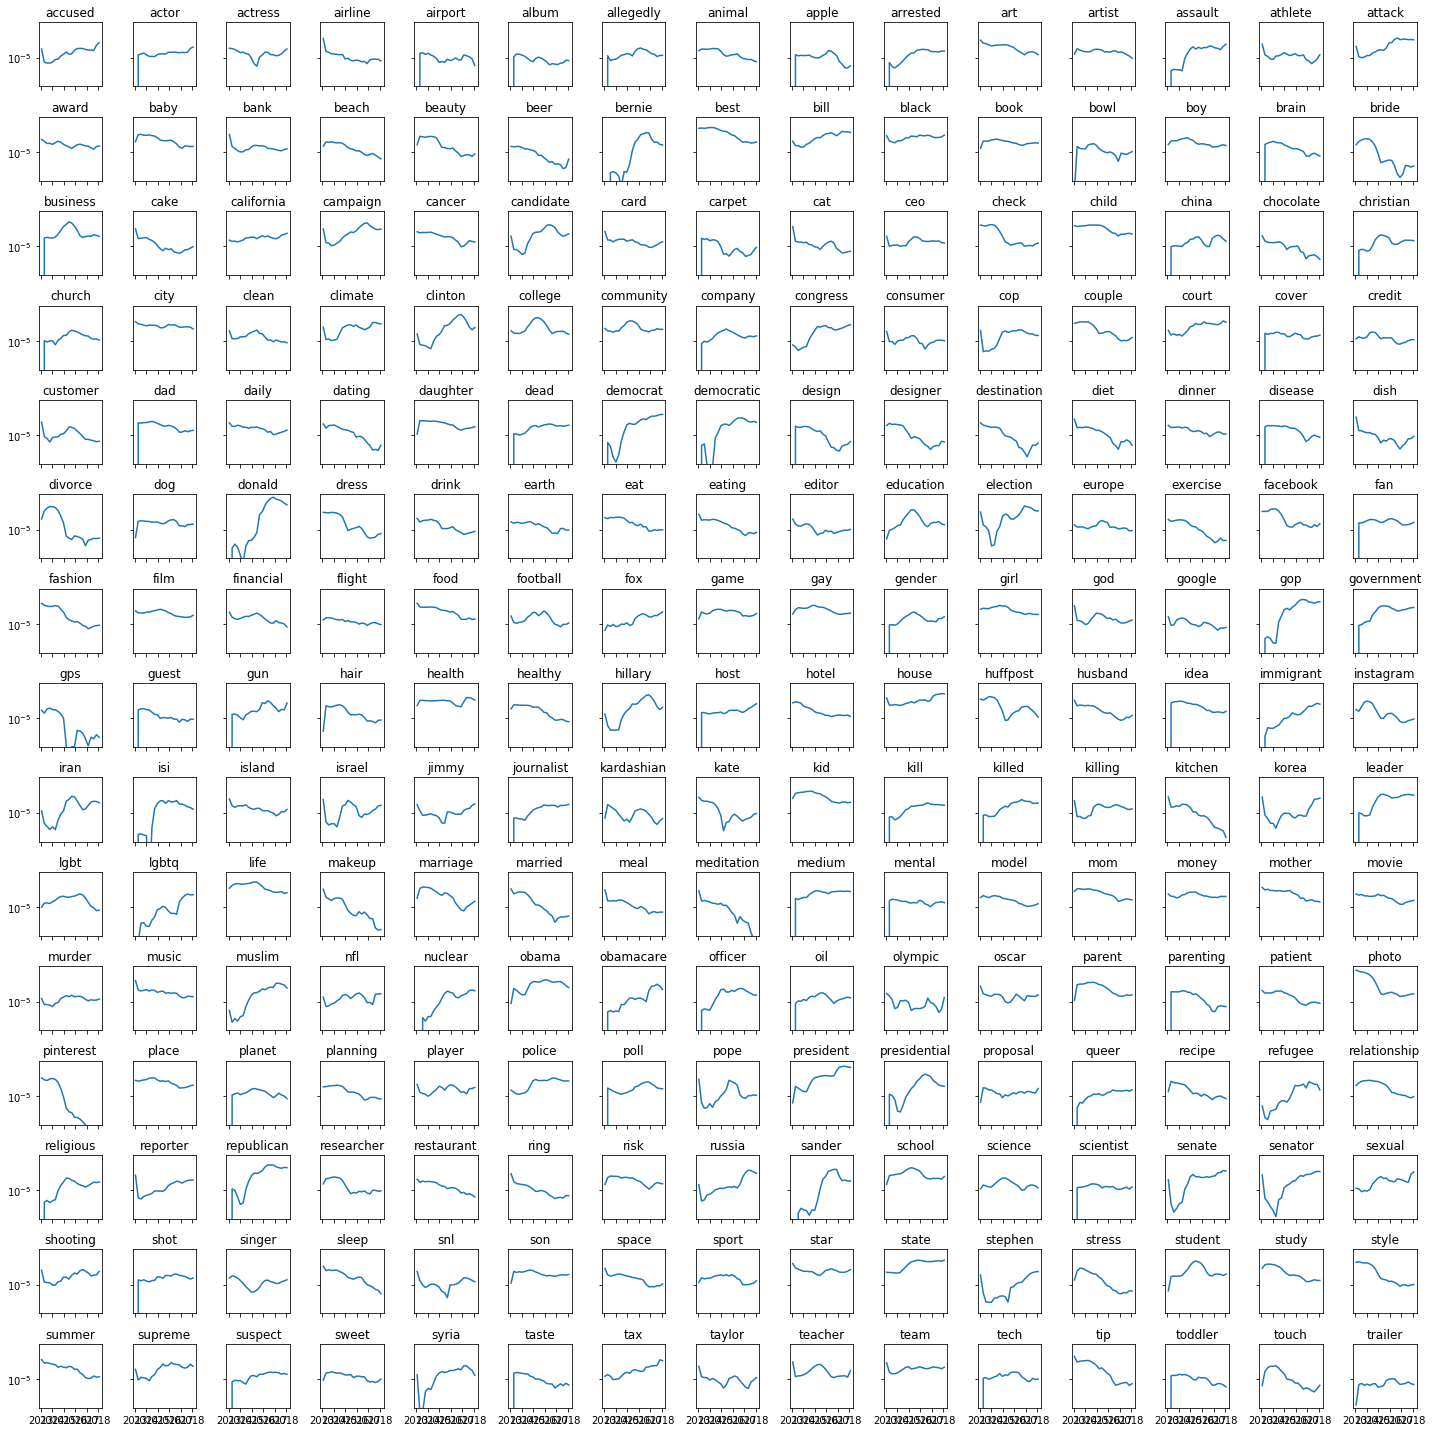

In [149]:
nf = len(features)
temp = int(np.sqrt(nf))

fig, axarr = plt.subplots(temp, temp, figsize=(20,20), sharex=True, sharey=True)

for ax, feat in zip(axarr.flatten(), features):
    ts_i = [df[feat].sum()/df.sum().sum() for df in dfs]
    ax.plot(time, ts_i)
    ax.set_title(feat)
    
plt.yscale('log')
plt.tight_layout()

# Exploring terms

In [180]:
nf = len(features)

mat = np.zeros((nf, nf))


mats = []

for df in dfs:
    for i, feat1 in enumerate(features):
        for j, feat2 in enumerate(features[:i]):
            lam = lambda df,feat1,feat2: (df[feat1]*df[feat2]).sum()/(df[feat1].sum() + df[feat2].sum())
            mat[i, j] = lam(df,feat1,feat2)
            mat[j, i] = lam(df,feat1,feat2)

    mats += [mat]


KeyboardInterrupt: 